In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prerequisites: Load data

In [3]:
# set up constants

BASE_GENRES = [
    "genre_blues",
    "genre_classical",
    "genre_country",
    "genre_disco",
    "genre_hiphop",
    "genre_jazz",
    "genre_metal",
    "genre_pop",
    "genre_reggae",
    "genre_rock"
]

STRATIFY = ['stratify']

KEY = ['metadata_path']

In [4]:
# load base dataframe

import pandas as pd

filepath = "/content/drive/MyDrive/w207/mids_w207_music_genre/member_workspaces/lawrence/mtg_jamendo_genre_features_base.feather"
df_base = pd.read_feather(filepath)

In [5]:
# split base data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np


# get features
FEATURES = list(set(df_base.columns) - set(BASE_GENRES) - set(STRATIFY) - set(KEY))
X = df_base[FEATURES]

# get targets
enc = LabelEncoder()
y = enc.fit_transform(df_base[STRATIFY].values.reshape(-1))

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
  
# X_train, X_valid, y_train, y_valid = \
#     train_test_split(X_train, y_train, test_size=0.25, random_state=10, stratify=y_train)

print(F"X_train: {X_train.shape}")
# print(F"X_valid: {X_valid.shape}")
print(F"X_test:  {X_test.shape}")

# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
# X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


X_train: (17080, 2739)
X_test:  (4271, 2739)


---

# Random forest w/o feature selection

## Experiment \#1: Random forest with default parameters

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(class_weight="balanced", n_jobs=-1)
clf.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
# valid_accuracy = accuracy_score(y_valid, clf.predict(X_valid))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

print(F"Train accuracy: {train_accuracy}")
# print(F"Valid accuracy: {valid_accuracy}")
print(F"Test accuracy:  {test_accuracy}")

Train accuracy: 1.0
Test accuracy:  0.6754858346991337


---
## Experiment \#2: Random forest with different max_depths

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tolerance = 10
train_accuracies = []
test_accuracies = []
max_depths = np.arange(1, 100, 1)

for i in max_depths:
  clf = RandomForestClassifier(class_weight="balanced", 
                              n_jobs=-1,
                              max_depth=i)
  clf.fit(X_train, y_train)

  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  train_accuracies.append(train_accuracy)
  test_accuracy = accuracy_score(y_test, clf.predict(X_test))
  test_accuracies.append(test_accuracy)

  print(F"Training with a random forest of max_depth={i}")
  print(F"Train accuracy: {train_accuracy}")
  print(F"Test accuracy:  {test_accuracy}")
  if train_accuracy > (test_accuracy+0.05):
    print(F"Overfitting detected!")
    if tolerance == 0:
      break
    tolerance -= 1
  else:
    tolerance = 10
  print(F"-"*100)

Training with a random forest of max_depth=1
Train accuracy: 0.28612412177985946
Test accuracy:  0.28845703582299226
----------------------------------------------------------------------------------------------------
Training with a random forest of max_depth=2
Train accuracy: 0.3177400468384075
Test accuracy:  0.32966518379770543
----------------------------------------------------------------------------------------------------
Training with a random forest of max_depth=3
Train accuracy: 0.3740046838407494
Test accuracy:  0.37953640833528446
----------------------------------------------------------------------------------------------------
Training with a random forest of max_depth=4
Train accuracy: 0.4269320843091335
Test accuracy:  0.43362210255209555
----------------------------------------------------------------------------------------------------
Training with a random forest of max_depth=5
Train accuracy: 0.47096018735363
Test accuracy:  0.46640131116834466
-----------------

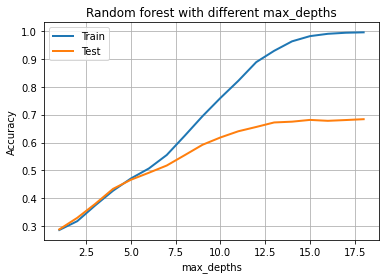

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(max_depths[:len(train_accuracies)], train_accuracies, linewidth=2.0, label='Train')
ax.plot(max_depths[:len(test_accuracies)], test_accuracies, linewidth=2.0, label='Test')
ax.set_title("Random forest with different max_depths")
ax.set_xlabel("max_depths")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid()
fig.show()

---
## Experiment \#3: Random forest with different n_estimators

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tolerance = 10
train_accuracies = []
test_accuracies = []
n_estimators = np.arange(10, 1000, 10)

for i in n_estimators:
  clf = RandomForestClassifier(class_weight="balanced", 
                              n_jobs=-1,
                              n_estimators=i)
  clf.fit(X_train, y_train)

  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  train_accuracies.append(train_accuracy)
  test_accuracy = accuracy_score(y_test, clf.predict(X_test))
  test_accuracies.append(test_accuracy)

  print(F"Training with a random forest of n_estimators={i}")
  print(F"Train accuracy: {train_accuracy}")
  print(F"Test accuracy:  {test_accuracy}")
  if train_accuracy > (test_accuracy+0.05):
    print(F"Overfitting detected!")
    if tolerance == 0:
      break
    tolerance -= 1
  else:
    tolerance = 10
  print(F"-"*100)

Training with a random forest of n_estimators=10
Train accuracy: 0.9921545667447307
Test accuracy:  0.617888082416296
Overfitting detected!
----------------------------------------------------------------------------------------------------
Training with a random forest of n_estimators=20
Train accuracy: 0.9984777517564403
Test accuracy:  0.6506672910325451
Overfitting detected!
----------------------------------------------------------------------------------------------------
Training with a random forest of n_estimators=30
Train accuracy: 0.9994145199063232
Test accuracy:  0.6593303675954109
Overfitting detected!
----------------------------------------------------------------------------------------------------
Training with a random forest of n_estimators=40
Train accuracy: 0.9998829039812647
Test accuracy:  0.66448138609225
Overfitting detected!
----------------------------------------------------------------------------------------------------
Training with a random forest of n_

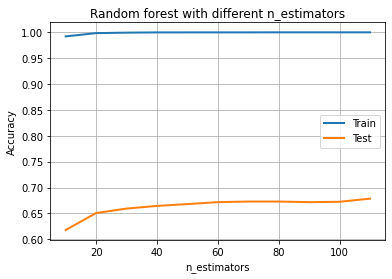

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(n_estimators[:len(train_accuracies)], train_accuracies, linewidth=2.0, label='Train')
ax.plot(n_estimators[:len(test_accuracies)], test_accuracies, linewidth=2.0, label='Test')
ax.set_title("Random forest with different n_estimators")
ax.set_xlabel("n_estimators")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid()
fig.show()